## Diseño aerodinámico

Existen cuatro variables que representan valores de parámetros para el diseño de el ala de una aeronave. Cada uno de estos parámetros puede tomar un valor entre 0 y 63.

El modelo aerodinámico dice que la elevación del ala está dada por la formula:

Elevación = (A - B)2 + (C - D)2 - (A-30)3 - (C-40)3

Encontrar los valores de parámetros que maximicen la elevación del ala.

## Codificación

- Definir como se codificará el problema

Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representará el valor de A,B,C y D.

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?


In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
#equation_inputs : valores de entrada
#pop : población
def cal_pop_fitness(population):
    fitness = []
    for pop in population:
        fitness.append( (( pop[0] - pop[1])**2 + ( pop[2] - pop[3])**2 - (pop[0] - 30))**3 - (pop[2] - 40)**3 )
    return fitness

## Selección

In [2]:
#pop: población
#fitness: arreglo con los valores de adaptación
#num_parent: cantidad de padres que se quieren obtener
def select_mating_pool(pop, fitness, num_parents):
    #Crear arreglo vacío que contendrá los padres seleccionados
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        #Obtener individuo con mayor adaptación
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        #Obtener índice del individuo
        max_fitness_idx = max_fitness_idx[0][0]
        #Cargar individuo a la lista de padres
        parents[parent_num, :] = pop[max_fitness_idx, :]
        #Setear valor de adaptación a un valor muy malo para que no vuelva a ser elegido
        fitness[max_fitness_idx] = -99999999999
    #Devolver lista de padres
    return parents

## Cruza

In [3]:
#parents: lista de padres
#offspring_size: cantidad de hijos que se quieren obtener
def crossover(parents, offspring_size):
    #Generar arreglo vacío donde se guardarán los hijos
    offspring = numpy.empty((offspring_size,parents.shape[1]))
    #Definir punto de cruce en la mitad de los padre
    crossover_point = numpy.uint8(parents.shape[0]/2)
    for k in range(offspring_size):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar el primer hijo con la primer mitad de un padre y la segunda de otro
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Generar el segundo hijo con las partes opuestas
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    #Devolver lista de hijos
    return offspring

## Mutación

In [4]:
#offspring_crossover: lista de hijos a mutar
def mutation(offspring_crossover):
    
    for idx in range(offspring_crossover.shape[0]):
        #Generar un valor aleatorio
        random_value = numpy.random.uniform(0, 63)
        # Sumar el valor aleatorio a uno de los genes
        offspring_crossover[idx, numpy.random.randint(low=0, high=(offspring_crossover.shape[1]-1) )] = random_value
        #offspring_crossover[idx, numpy.random.randint(low=0, high=(offspring_crossover.shape[1]-1) )] = offspring_crossover.shape[idx,offspring_crossover.shape[1] ] + random_value
    #Devolver lista de hijos mutados
    return offspring_crossover

# Algoritmo

In [5]:
#Cantidad de genes
num_genes = 4
#Soluciones por población
sol_per_pop = 10000
#Número de padres para cruza
num_parents_mating = 40
#Tamaño de la población
pop_size = (sol_per_pop,num_genes) 
#Crear pobliación inicial con valores aleatorios
new_population = numpy.random.uniform(low=0.0, high=63.0, size=pop_size)
print("Población inicial: ")
print(new_population)
#Cantidad de generaciones a realizar
num_generations = 200

Población inicial: 
[[ 5.5723833  46.57507262 21.1720797  14.13719573]
 [37.4256117  32.83563286 56.66259574 10.55469707]
 [20.52768286 56.15650727 32.83037549 61.95736568]
 ...
 [33.93977643 26.59897225 33.96491625 23.55696398]
 [21.50214455 27.47735074 57.39921588 52.60893822]
 [19.41555221 34.60046269 52.77605832 50.40827715]]


6616017011777.631
0
7335163460773.062
1
7538713210295.863
2
7538713210295.863
3
7538713210295.863
4
7538713210295.863
5
7538713210295.863
6
7538713210295.863
7
7538713210295.863
8
7538713210295.863
9
7538713210295.863
10
7541940522141.219
11
7541940522141.219
12
7543166736122.31
13
7543166736122.31
14
7543166736122.31
15
7543166736122.31
16
7543166736122.31
17
7543391097676.327
18
7543391097676.327
19
7544512390345.679
20
7544512390345.679
21
7544512390345.679
22
7544512390345.679
23
7544512390345.679
24
7544512390345.679
25
7544512390345.679
26
7544512390345.679
27
7544512390345.679
28
7544512390345.679
29
7544512390345.679
30
7544512390345.679
31
7544512390345.679
32
7544512390345.679
33
7544512390345.679
34
7544512390345.679
35
7544512390345.679
36
7544512390345.679
37
7544512390345.679
38
7544512390345.679
39
7544512390345.679
40
7544512390345.679
41
7544512390345.679
42
7544512390345.679
43
7544512390345.679
44
7544512390345.679
45
7544512390345.679
46
7544512390345.679
47
7544512

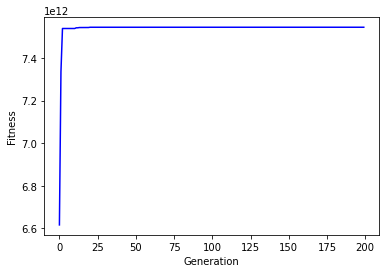

In [6]:
gen = []
fit = []
for generation in range(num_generations):
    # Obtener valores de adaptación de la población
    fitness = cal_pop_fitness(new_population)
    # Selección
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    # Cruza
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0]))

    # Mutación
    offspring_mutation = mutation(offspring_crossover)

    # Crear nueva población basada en los padres y los hijos
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
       

    # Obtener mejor resultado para la generación
    fit.append(numpy.max(cal_pop_fitness(new_population)))
    print(numpy.max(cal_pop_fitness(new_population)))
    gen.append(generation)
    print(generation)
    

#Obtener la mejor solución
fitness = cal_pop_fitness(new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))
print("Mejor resultado : ", new_population[best_match_idx, :])
print("Adaptación del mejor resultado : ", fitness[best_match_idx[0][0]])

#Gráfico
fig, ax = plt.subplots()
ax.plot(gen, fit, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()